In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
wine=pd.read_csv("wine.csv")

In [3]:
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
wine.data = wine.iloc[:,1:]
wine_val=wine.data.values

In [6]:
wine.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [8]:
from sklearn.preprocessing import MinMaxScaler
wine_norm = MinMaxScaler(feature_range=(0,1)).fit_transform(wine)

In [9]:
from sklearn.preprocessing import scale

wine_std = scale(wine)
print(wine_std)

[[-1.21394365  1.51861254 -0.5622498  ...  0.36217728  1.84791957
   1.01300893]
 [-1.21394365  0.24628963 -0.49941338 ...  0.40605066  1.1134493
   0.96524152]
 [-1.21394365  0.19687903  0.02123125 ...  0.31830389  0.78858745
   1.39514818]
 ...
 [ 1.37386437  0.33275817  1.74474449 ... -1.61212515 -1.48544548
   0.28057537]
 [ 1.37386437  0.20923168  0.22769377 ... -1.56825176 -1.40069891
   0.29649784]
 [ 1.37386437  1.39508604  1.58316512 ... -1.52437837 -1.42894777
  -0.59516041]]


In [10]:
from sklearn.decomposition import PCA

pca = PCA()
pca_values = pca.fit_transform(wine_std)
Z = pca.components_
print(Z)

[[ 0.39366953 -0.13632501  0.22267638 -0.00225793  0.22429849 -0.12463016
  -0.35926404 -0.39071171  0.2670012  -0.2790625   0.08931829 -0.27682265
  -0.35052618 -0.26951525]
 [-0.00569041 -0.48416087 -0.22359095 -0.31585588  0.01161574 -0.30055143
  -0.06711983  0.00131345 -0.0269887  -0.04122256 -0.52978274  0.27790735
   0.16277625 -0.36605886]
 [ 0.00121795 -0.20740081  0.08879606  0.62610236  0.6119896   0.13098458
   0.14650775  0.15096275  0.16997551  0.14987959 -0.1372663   0.08532854
   0.16620436 -0.12668685]
 [ 0.12246373 -0.08191848  0.46988824 -0.24984122  0.07199322 -0.16321412
   0.19098521  0.14461667 -0.32801272  0.46275771  0.07211248 -0.43466618
   0.15672341 -0.2557949 ]
 [ 0.15758395 -0.25089415 -0.18860015 -0.0935236   0.0465675   0.77833048
  -0.14466563 -0.11200553 -0.43257916  0.0915882  -0.0462696  -0.02986657
  -0.14419358 -0.08440794]
 [ 0.20033864 -0.13517139 -0.59841948 -0.10799983  0.08811224 -0.14483831
   0.14809748  0.06247252  0.25868639  0.46627764  

In [11]:
var = pca.explained_variance_ratio_
print(var)


[0.39542486 0.17836259 0.10329102 0.06627984 0.06267875 0.0480556
 0.03955707 0.02500244 0.02103871 0.01873615 0.01613203 0.01205691
 0.00925458 0.00412945]


In [12]:
var1 = np.cumsum(np.round(var,decimals = 4)*100)
print(var1)

[ 39.54  57.38  67.71  74.34  80.61  85.42  89.38  91.88  93.98  95.85
  97.46  98.67  99.6  100.01]


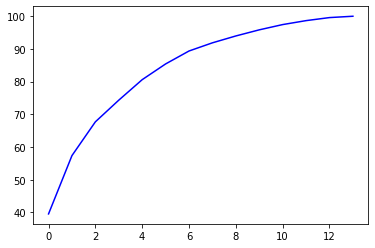

In [13]:
plt.plot(var1,color="blue")
plt.show()

C:\Users\Anwesha\anaconda3\lib\site-packages\matplotlib\collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


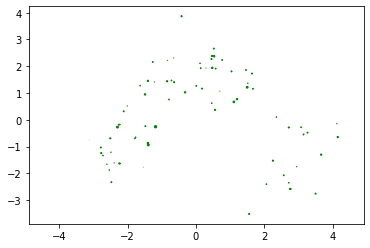

In [14]:
x = pca_values[:,0:1]
y = pca_values[:,1:2]
z=  pca_values[:,2:3]

plt.scatter(x,y,z, color = "green")
plt.show()

In [ ]:
# model with PCA
#K means

In [17]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
df_pca = pca_values[:,0:3]


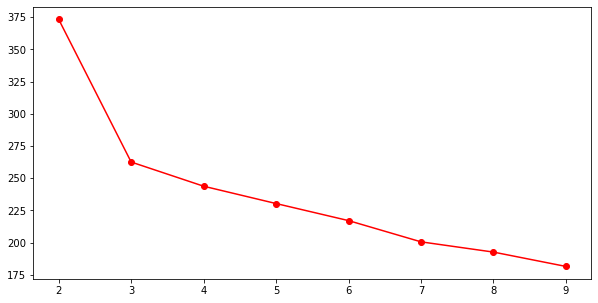

In [18]:
k = list(range(2,10))

Total_WSS=[]

for i in k:
    kmean=KMeans(n_clusters=i).fit(df_pca)
    WSS=[]
    for j in range(i):
        WSS.append(sum(cdist(df_pca[kmean.labels_==j,:],kmean.cluster_centers_[j].reshape(1,df_pca.shape[1]),"euclidean" )))
    Total_WSS.append(sum(WSS))
plt.figure(figsize=(10,5))
plt.plot(k,Total_WSS,'ro-') 
plt.xticks(k)
plt.show()

In [19]:
# Applying K-means clustering

Kmean_model=KMeans(n_clusters=3).fit(df_pca)
model_labels=pd.Series(Kmean_model.labels_)  # converting numpy array into pandas series object 

# model_labels
wine['Kmean_cluster']=model_labels # creating a  new column and assigning it to new column 
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Kmean_cluster
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [20]:
#Kierarchical clustering

In [22]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage
from sklearn.cluster import AgglomerativeClustering

In [23]:
df_Hier = pca_values[:,0:3]

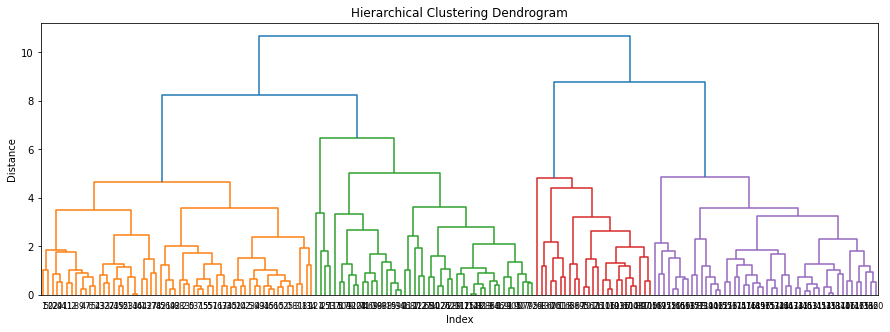

In [24]:
link = linkage(df_Hier, method="complete", metric="euclidean")

plt.figure(figsize=(15,5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(link,leaf_rotation=0,leaf_font_size=8)
plt.show()

In [25]:
hier_cluster= AgglomerativeClustering(n_clusters=4, linkage='complete',affinity = "euclidean").fit(df_Hier)
cluster_label= pd.Series(hier_cluster.labels_)
wine["Hier_Cluster"] = cluster_label
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Kmean_cluster,Hier_Cluster
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,3
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,3
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,3
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1,3
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1,0


In [26]:
wine.to_csv("wine_clustering.csv")

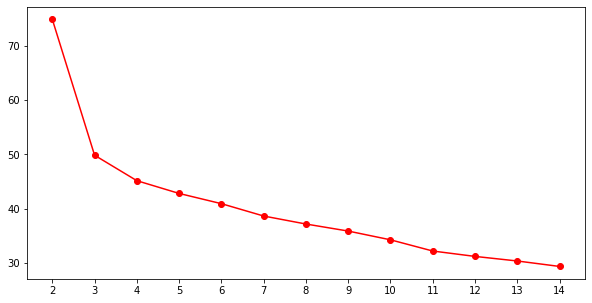

In [27]:
wine_new=pd.DataFrame(wine_norm,columns=["Type","Alcohol","Malic","Ash","Alcalinity","Magnesium","Phenols","Flavanoids","Nonflavanoids","Proanthocyanins","Color","Hue","Dilution","Proline"])
TWSS=[]
k=range(2,15)
for i in k:
    kmeans=KMeans(n_clusters=i).fit(wine_new)
    TWSS.append(kmeans.inertia_)

plt.figure(figsize=(10,5))    
plt.plot(k,TWSS,'ro-')
plt.xticks(k)
plt.show()

In [28]:
#without pca

In [29]:
Kmean_model=KMeans(n_clusters=3).fit(wine_new)
model_labels=pd.Series(Kmean_model.labels_)  # converting numpy array into pandas series object 

# model_labels
wine_new['Kmean_cluster']=model_labels # creating a  new column and assigning it to new column 
wine_new.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Kmean_cluster
0,0.0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,2
1,0.0,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,2
2,0.0,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,2
3,0.0,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,2
4,0.0,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,2


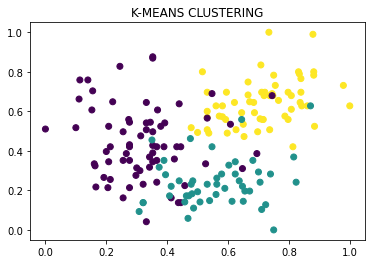

In [30]:
plt.scatter(x=wine_new["Alcohol"],y=wine_new["Phenols"],c=wine_new["Kmean_cluster"])
plt.title("K-MEANS CLUSTERING")
plt.show()